dataset from CHLOE ZHAO again!!!

In [14]:
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, Input
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
notchloe = True

In [16]:
def not_chloe(b):
    if b is True:
        return "elaineran", "Desktop"
    else: 
        return "chloezhao", "summer 2024 project"

In [17]:
data_path = "/Users/"+not_chloe(notchloe)[0] + "/"+not_chloe(notchloe)[1]+"/summer-project/generated_chords/"
metadata_path = "/Users/"+not_chloe(notchloe)[0] +"/"+not_chloe(notchloe)[1]+"/summer-project/piano_chords.csv"

In [18]:
def load_data(data_path, metadata_path):
    features = []
    labels = []


    metadata = pd.read_csv(metadata_path)


    for index, row in metadata.iterrows():
        file_path = os.path.join(data_path, f"{row['File Names']}.wav")


        # Load the audio file and resample it
        target_sr = 22050
        audio, sample_rate = librosa.load(file_path, sr=target_sr)

        # Check if the audio length is less than the default n_fft size
        if len(audio) < 2048:
            # Pad the audio file with zeros
            audio = np.pad(audio, (0, 2048 - len(audio)), mode='constant')



        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=target_sr, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)


        # Append features and labels
        features.append(mfccs_scaled)
        labels.append(row['Number of Notes'])


    return np.array(features), np.array(labels)



In [19]:
features, labels = load_data(data_path, metadata_path)


# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
labels_onehot = to_categorical(labels_encoded)


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels_onehot, test_size=0.2, random_state=42)


In [21]:
input_shape = (X_train.shape[1], 1)
model = Sequential()
model.add(Conv1D(64, 3, padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [24]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100


2024-06-30 18:17:25.419539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-30 18:17:25.484155: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


23/25 [==========================>...] - ETA: 0s - loss: 14.3525 - accuracy: 0.1780

2024-06-30 18:17:26.425449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 3s 68ms/step - loss: 13.8079 - accuracy: 0.1800 - val_loss: 3.7084 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 1s 21ms/step - loss: 5.8850 - accuracy: 0.2512 - val_loss: 2.6326 - val_accuracy: 0.2650
Epoch 3/100
25/25 [==============================] - 1s 21ms/step - loss: 3.2560 - accuracy: 0.2600 - val_loss: 1.8279 - val_accuracy: 0.2650
Epoch 4/100
25/25 [==============================] - 1s 21ms/step - loss: 2.5868 - accuracy: 0.2800 - val_loss: 1.8448 - val_accuracy: 0.2850
Epoch 5/100
25/25 [==============================] - 1s 20ms/step - loss: 2.2533 - accuracy: 0.2825 - val_loss: 1.7998 - val_accuracy: 0.2950
Epoch 6/100
25/25 [==============================] - 1s 20ms/step - loss: 2.2328 - accuracy: 0.3013 - val_loss: 1.9971 - val_accuracy: 0.3000
Epoch 7/100
25/25 [==============================] - 1s 20ms/step - loss: 1.9999 - accuracy: 0.3000 - val_loss: 1.9048 - val_accuracy: 0.2900
Epoch 8/100
25/25

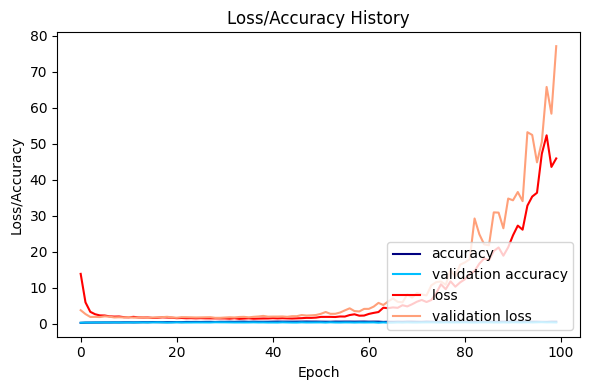

In [25]:
# plotting from history

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))

figsize = (6, 4)
fig, axis1 = plt.subplots(figsize=figsize)
plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")


plots = plot1_loss + plot1_val_loss
labs = [plot.get_label() for plot in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History")
plt.tight_layout()
axis1.legend(loc='lower right')
plt.savefig("/Users/elaineran/Desktop/summer-project/figures/Loss-Accuracy-Notes")
plt.show()

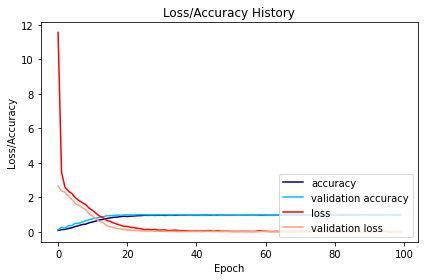

In [12]:
# plotting from history

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = list(range(len(loss)))

figsize = (6, 4)
fig, axis1 = plt.subplots(figsize=figsize)
plot1_lacc = axis1.plot(epochs, acc, 'navy', label='accuracy')
plot1_val_lacc = axis1.plot(epochs, val_acc, 'deepskyblue', label="validation accuracy")

plot1_loss = axis1.plot(epochs, loss, 'red', label='loss')
plot1_val_loss = axis1.plot(epochs, val_loss, 'lightsalmon', label="validation loss")


plots = plot1_loss + plot1_val_loss
labs = [plot.get_label() for plot in plots]
axis1.set_xlabel('Epoch')
axis1.set_ylabel('Loss/Accuracy')
plt.title("Loss/Accuracy History")
plt.tight_layout()
axis1.legend(loc='lower right')
plt.savefig("/Users/elaineran/Desktop/summer-project/figures/Loss-Accuracy-Notes")
plt.show()

In [30]:
test_predictions = model.predict(X_test)

7/7 [==============================] - 0s 5ms/step


In [31]:
predicted_class_indices = np.argmax(test_predictions, axis=1)
predicted_classes = le.inverse_transform(predicted_class_indices)
print(predicted_classes)

[8 3 5 3 6 8 4 4 8 8 3 8 6 3 5 2 8 5 6 8 8 8 6 5 5 5 5 2 3 8 3 5 5 8 6 8 3
 3 4 8 3 8 8 3 8 3 6 2 2 6 3 8 6 2 2 4 2 4 8 2 8 3 3 2 4 3 8 8 5 3 2 3 6 4
 3 2 2 4 8 4 8 3 8 8 8 8 3 3 6 8 8 7 8 5 4 3 3 8 4 8 3 3 4 5 8 6 6 6 5 3 4
 3 4 3 3 5 6 8 3 3 2 6 5 5 5 5 4 3 6 8 6 6 2 2 5 3 2 8 6 4 4 6 6 8 5 4 5 3
 8 3 8 3 4 4 6 8 8 3 8 6 3 3 6 8 6 3 8 3 4 3 3 2 8 8 5 8 5 4 4 6 6 6 3 6 8
 2 2 8 3 8 5 5 8 6 3 6 4 3 5 8]


In [32]:
y_true = np.argmax(y_test, axis=1)
true_classes = le.inverse_transform(y_true)
print(true_classes)

[8 2 5 4 6 7 3 3 3 8 3 6 4 3 6 2 6 5 4 8 4 6 6 5 6 4 3 2 5 8 2 5 7 7 5 7 2
 6 4 7 2 7 5 3 8 2 6 2 2 5 6 7 7 2 2 5 2 6 6 2 4 3 2 2 3 5 6 8 8 3 2 2 6 7
 3 3 3 3 7 4 7 3 8 5 5 6 5 7 3 7 6 7 6 6 6 2 2 5 3 5 2 2 7 3 7 8 6 4 6 5 4
 2 3 2 2 8 7 7 5 7 2 4 7 6 7 7 3 3 7 7 4 5 2 2 4 4 3 6 4 3 4 8 5 7 4 6 8 3
 8 3 7 5 4 8 6 7 8 5 6 7 3 4 6 7 5 5 8 8 5 2 3 2 7 8 8 7 7 5 7 4 5 5 4 4 5
 2 3 6 6 8 4 5 5 5 3 6 6 7 5 8]


In [34]:
unique_labels = np.unique(np.concatenate([y_true, predicted_class_indices]))


# Calculate accuracy
accuracy = accuracy_score(y_true, predicted_class_indices)
print("Accuracy:", accuracy)


# Generate a classification report
print(classification_report(y_true, predicted_class_indices, labels=unique_labels, target_names=le.inverse_transform(unique_labels)))


# Confusion matrix
cm = confusion_matrix(y_true, predicted_class_indices)
print("Confusion Matrix:\n", cm)

NameError: name 'accuracy_score' is not defined

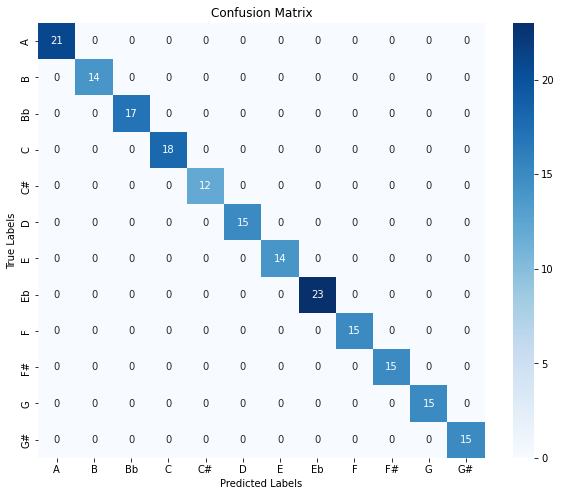

In [17]:


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("/Users/elaineran/Desktop/summer-project/figures/Confusion-Matrix-Notes")
plt.show()


In [18]:
import soundfile as sf
from pydub import AudioSegment
import librosa.display

In [45]:
# Load an audio file
audio_path = '/Users/elaineran/Desktop/summer-project/testing_soundfiles/falalala2.wav'
y, sr = librosa.load(audio_path)

# Onset detection
onset_frames = librosa.onset.onset_detect(y=y, sr=sr)
onset_times = librosa.frames_to_time(onset_frames, sr=sr)

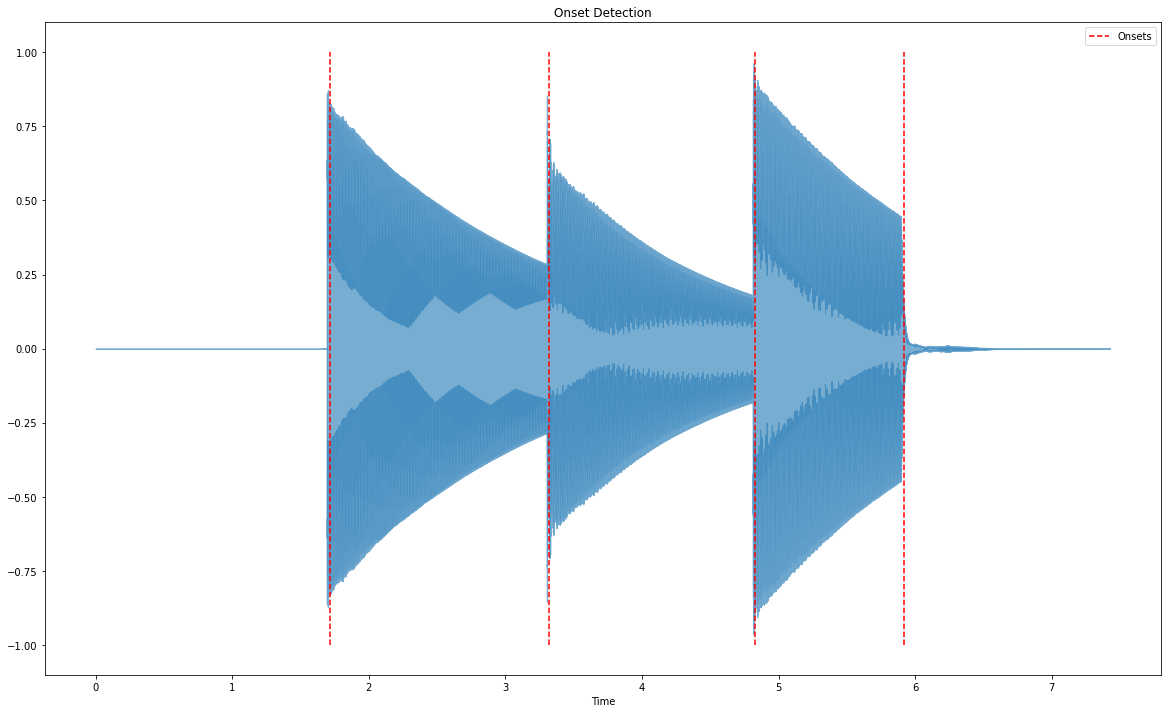

Detected onset times: [1.71827664 3.32045351 4.82975057 5.92108844]


In [46]:
# Plotting the waveform and onsets
plt.figure(figsize=(20, 12))
librosa.display.waveshow(y, sr=sr, alpha=0.6)
plt.vlines(onset_times, ymin=-1, ymax=1, color='r', linestyle='--', label='Onsets')
plt.title('Onset Detection')
plt.legend()
plt.show()

# Print the detected onset times
print('Detected onset times:', onset_times)


In [47]:
onset_times = np.append(onset_times, librosa.get_duration(y=y, sr=sr))

# Split and save the audio segments
for i in range(len(onset_times) - 1):
    start_sample = int(onset_times[i] * sr)
    end_sample = int(onset_times[i + 1] * sr)
    segment = y[start_sample:end_sample]
    segment_filename = f'segment_{i + 1}.wav'
    sf.write("/Users/elaineran/Desktop/summer-project/testing_soundfiles/" + segment_filename, segment, sr)
    print(f'Saved {segment_filename} from {onset_times[i]:.2f}s to {onset_times[i + 1]:.2f}s')

Saved segment_1.wav from 1.72s to 3.32s
Saved segment_2.wav from 3.32s to 4.83s
Saved segment_3.wav from 4.83s to 5.92s
Saved segment_4.wav from 5.92s to 7.43s


In [50]:
test_audio_path = "/Users/elaineran/Desktop/summer-project/testing_soundfiles/segment_3.wav"
audio, _ = librosa.load(test_audio_path, sr=22050)
# Pad the audio file if necessary
if len(audio) < 2048:
    audio = np.pad(audio, (0, 2048 - len(audio)), mode='constant')
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=40)
mfccs_scaled = np.mean(mfccs.T, axis=0)
mfccs_scaled = mfccs_scaled.reshape(1, mfccs_scaled.shape[0], 1)

# Predict the chord
predicted_probabilities = model.predict(mfccs_scaled)
predicted_label = np.argmax(predicted_probabilities, axis=1)
predicted_note = le.inverse_transform(predicted_label)

print(f"The predicted note is: {predicted_note[0]}")

The predicted note is: D


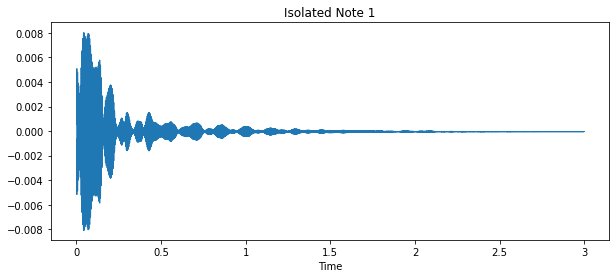

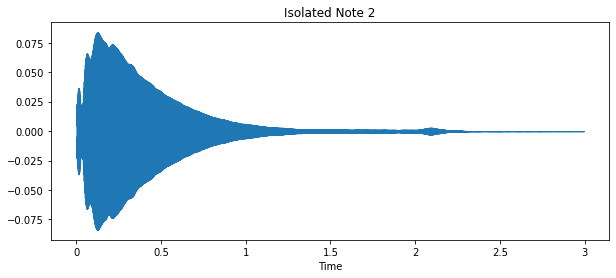

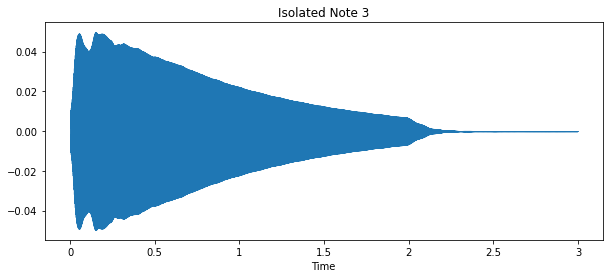

In [25]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

# Step 1: Load the audio file
y, sr = librosa.load(y, sr = librosa.load('/Users/elaineran/Downloads/archive2/piano_triads/A_maj_4_0.wav'))

# Step 2: Perform Harmonic-Percussive Source Separation
harmonic, percussive = librosa.effects.hpss(y)

# Step 3: Compute the STFT of the harmonic component
D_harmonic = librosa.stft(harmonic)
S_db_harmonic = librosa.amplitude_to_db(np.abs(D_harmonic), ref=np.max)

# Step 4: Identify Peaks in the Harmonic Spectrogram
# Sum the magnitude of the spectrogram across time
frequency_magnitude = np.mean(np.abs(D_harmonic), axis=1)
# Use a simple peak picking algorithm to identify peaks
peaks, _ = find_peaks(frequency_magnitude, height=np.mean(frequency_magnitude) / 2)

# Step 5: Isolate and Reconstruct Each Note
components = []
for peak in peaks:
    # Create a mask to isolate the peak
    mask = np.zeros_like(D_harmonic, dtype=bool)
    mask[peak-2:peak+3, :] = True  # Isolate the peak and its immediate neighbors
    isolated_D = np.where(mask, D_harmonic, 0)
    isolated_y = librosa.istft(isolated_D)
    components.append(isolated_y)

# Limit to the top 3 most significant peaks
components = components[:3]

# Step 6: Save and/or visualize the isolated components (notes)
for i, component in enumerate(components):
    sf.write(f'isolated_note_{i+1}.wav', component, sr)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(component, sr=sr)
    plt.title(f'Isolated Note {i+1}')
    plt.show()


In [69]:
test_audio_path = "/Users/elaineran/Desktop/summer-project/isolated_note_E.wav"
audio, _ = librosa.load(test_audio_path, sr=22050)
# Pad the audio file if necessary
if len(audio) < 2048:
    audio = np.pad(audio, (0, 2048 - len(audio)), mode='constant')
# Extract MFCC features
mfccs = librosa.feature.mfcc(y=audio, sr=22050, n_mfcc=40)
mfccs_scaled = np.mean(mfccs.T, axis=0)
mfccs_scaled = mfccs_scaled.reshape(1, mfccs_scaled.shape[0], 1)

# Predict the chord
predicted_probabilities = model.predict(mfccs_scaled)
predicted_label = np.argmax(predicted_probabilities, axis=1)
predicted_note = le.inverse_transform(predicted_label)

print(f"The predicted note is: {predicted_note[0]}")

The predicted note is: B


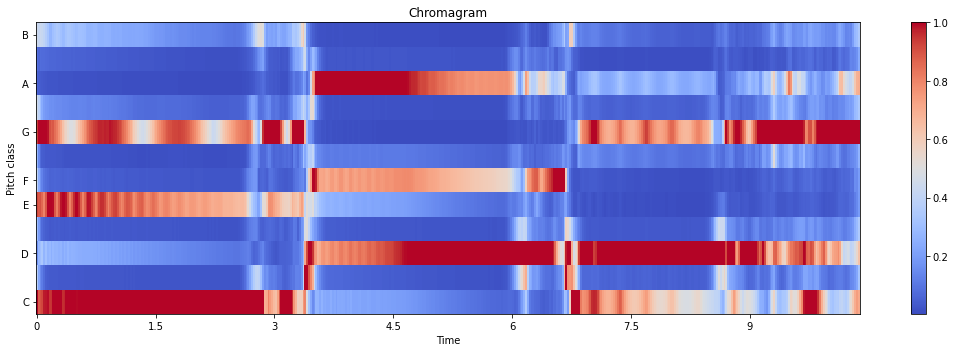

TypeError: viterbi() missing 1 required positional argument: 'transition'

In [60]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load the audio file
audio_path = '/Users/elaineran/Desktop/summer-project/multiplethings.wav'
y, sr = librosa.load(audio_path)

# Harmonic Percussive Source Separation (HPSS)
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Compute Chromagram
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Plot Chromagram
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()
plt.show()

# Detect chords (using librosa's beat-synchronous chromagram)
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
chroma_sync = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)

# Estimate chords
chord_labels = librosa.sequence.viterbi(chroma_sync)

# Plot chord labels
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma_sync, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.plot(librosa.frames_to_time(beat_frames), chord_labels, color='white', linewidth=2)
plt.title('Chord Recognition')
plt.colorbar()
plt.tight_layout()
plt.show()

# Identify chord changes
chord_changes = np.diff(chord_labels) != 0
change_times = librosa.frames_to_time(np.where(chord_changes)[0])

print("Chord changes detected at times (seconds):", change_times)


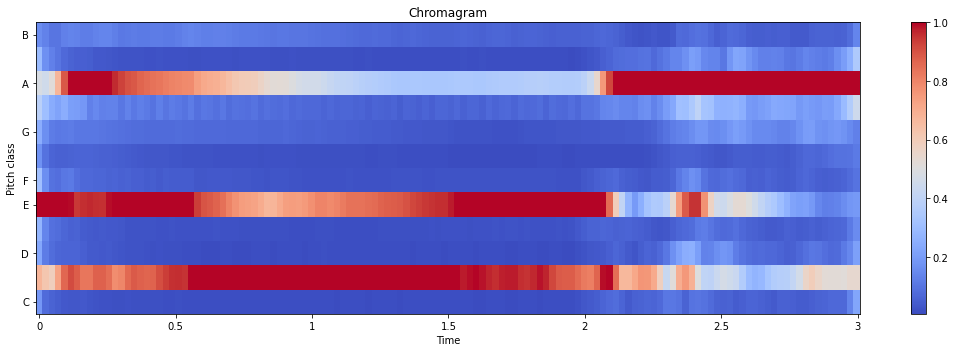

Identified notes: ['A' 'E' 'C#']


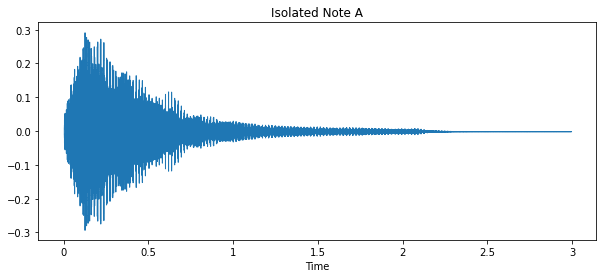

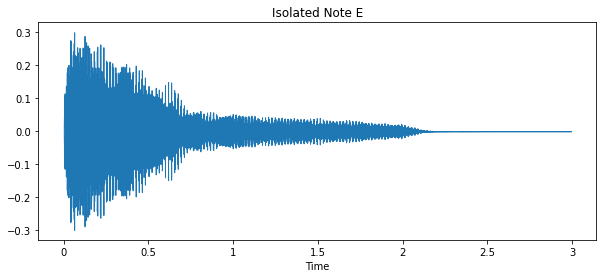

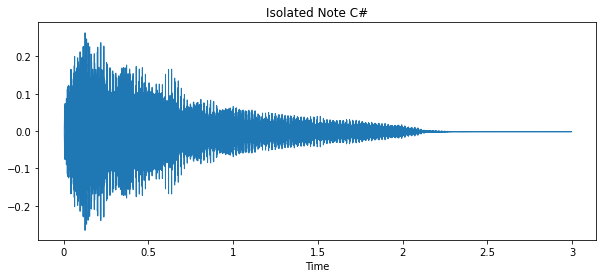

In [68]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf

# Step 1: Load the audio file
audio_path = '/Users/elaineran/Downloads/archive2/piano_triads/A_maj_4_0.wav'
y, sr = librosa.load(audio_path)

# Step 2: Harmonic Percussive Source Separation (HPSS)
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Step 3: Compute the Chromagram
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Plot Chromagram
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.title('Chromagram')
plt.colorbar()
plt.tight_layout()
plt.show()

# Step 4: Identify Peaks in the Chromagram
# Sum the chromagram across time to get the intensity of each pitch class
chroma_sum = np.sum(chromagram, axis=1)
# Identify peaks in the summed chromagram
peaks = np.argsort(chroma_sum)[-3:]  # Get indices of top 3 peaks

# Map chroma to note names
note_names = np.array(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
identified_notes = note_names[peaks]
print("Identified notes:", identified_notes)

# Step 5: Use the Chromagram to Create Masks and Isolate Notes Using STFT Frames
# Compute the STFT of the harmonic component
D_harmonic = librosa.stft(y_harmonic)
S_magnitude, S_phase = librosa.magphase(D_harmonic)

# Initialize an empty list to store the isolated notes
isolated_components = []

# Iterate over the identified peaks
for peak in peaks:
    # Create a mask for the identified note
    mask = chromagram[peak, :]
    mask = np.repeat(mask, S_magnitude.shape[1] // chromagram.shape[1])
    mask = mask[:S_magnitude.shape[1]]  # Ensure the mask length matches the number of STFT frames
    masked_S = S_magnitude * mask

    # Inverse transform to get the time-domain signal
    isolated_y = librosa.istft(masked_S * S_phase)
    isolated_components.append(isolated_y)

# Step 6: Save and/or visualize the isolated components (notes)
for i, component in enumerate(isolated_components):
    sf.write(f'isolated_note_{identified_notes[i]}.wav', component, sr)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(component, sr=sr)
    plt.title(f'Isolated Note {identified_notes[i]}')
    plt.show()


In [ ]:
import tensorflow as tf
from magenta.models.onsets_frames.transcription import model
from magenta.models.onsets_frames.transcription import infer_util
from magenta.music import audio_io
import librosa
import numpy as np

# Load the pre-trained model
checkpoint_path = 'path/to/onsets_frames_checkpoint'
transcription_model = model.OnsetsAndFrames()
transcription_model.restore_checkpoint(checkpoint_path)

# Load and preprocess the audio file
filename = 'your_audio_file.wav'
y, sr = librosa.load(filename, sr=16000)  # Model expects 16kHz sample rate

# Ensure the audio is mono
if y.ndim > 1:
    y = librosa.to_mono(y)

# Normalize the audio
y = y / np.max(np.abs(y))

# Use the model to transcribe the audio
frame_predictions, onset_predictions, _, _, _ = infer_util.run_on_audio(
    transcription_model, y, sr)

# Convert frame predictions to note events
notes = infer_util.predict_notes(frame_predictions, onset_predictions, sr)

# Convert note events to note names
def midi_to_note_name(midi_number):
    note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    octave = (midi_number // 12) - 1
    note = note_names[midi_number % 12]
    return f"{note}{octave}"

note_names = [midi_to_note_name(note[0]) for note in notes]
print("Detected notes:", note_names)